# Einführung in Neuronale Netze

<img src="https://upload.wikimedia.org/wikipedia/commons/3/3d/Neural_network.svg" alt="Ein Neuronales Netz (vereinfacht)" width="400px" />

## EINLEITUNGSTEXT
...

## Das einzelne Neuron
<img src="https://miro.medium.com/max/856/1*O7YSSqlOdQuNgMrH7J_3dg.png" alt="Das einzelne Neuron" />

Ein Neuronales Netz besteht aus vielen Neuronen, die miteinander verbunden sind. Dabei sind die Neuronen denen im Gehirn nachempfunden, welche untereinander verbunden sind und die aufeinander reagieren. Bei künstlichen Neuronalen Netzen hat jedes Neuron eine oder mehrere Eingaben $x_1...x_m$ und eine Ausgabe $o_j$. Die Eingaben werden mit Gewichten $w_1...w_m$ multipliziert und anschließend addiert ($ net_j = \displaystyle\sum_{i=1}^{m} (x_i \cdot w_i) $). Manchmal gibt es noch einen Bias $b_j$ ($j$ steht für ein bestimmtes Neuron. Jedes Neuron hat einen eigenen Bias). Dieser wird auf diese Summe drauf addiert ($ net_j = \displaystyle\sum_{i=1}^{m} (x_i \cdot w_i) + b_j $).Das Ergebnis wird dann in eine Aktivierungsfunktion $\varphi_j(x)$  gegeben, welche das Ergebnis in die Ausgabe des Neurons umwandelt $o_j = \varphi_j(net_j)$ und die dann ein Eingabewert (ein anderes $x$) für die nächsten Neuronen ist (oder die Ausgabe des Neuronalen Netzes darstellt, wenn das Neuron an der hintersten Ebene ist).

### Ein einfaches Beispiel 
 
Wir nehmen an wir haben ein Neuron mit zwei Inputs, welches die Sigmoid Funktion als Aktivierungsfunktion verwendet. Die folgenden Parameter sind gegeben:

$ w = [0, 1] == w1 = 0\ und\ w2 = 1 \\
$ b = 4

Nun geben wir dem Neuron ein input x mit x = [2, 3]

$$
(w*x)+b = ((w1 * x1) + (w2 * x2)) + b 
        = 0 * 2 + 1 * 3 + 4
        = 7
y = f(w * x + b) = f(7) = 0.999       
$$  

Für den Input x = [2, 3] bekommen wir einen Output von 0,999. Dieser Prozess in welchem man inputs eingibt, um ein Output zu bekommen ist bekannt als **feedforward** 

## Ein Neuron programmieren

Um das Neuron zu programmieren importieren wir Numpy. Numpy ist eine beliebte Python Library um mit Zahlen zu rechnen. 

In [1]:
#Wir importieren numpy als np um numpy nicht immer ausschreiben zu müssen
import numpy as np


def sigmoid(x):
  # Unsere Aktivierungsfunktion: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

class Neuron:
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias

  def feedforward(self, inputs):
    # Gewichtsinputs, Addiere Gewichte und dann nutze die Aktivierungsfunktion
    # np.dot ist eine Funktion um zwei Arrays zu multiplizieren 
    total = np.dot(self.weights, inputs) + self.bias
    return sigmoid(total)

weights = np.array([0, 1]) # w1 = 0, w2 = 1
bias = 4                   # b = 4
n = Neuron(weights, bias)

x = np.array([2, 3])       # x1 = 2, x2 = 3
print(n.feedforward(x))    # 0.9990889488055994

0.9990889488055994


Wie man sieht, kommen wir mit unserem selbstgecodeten Neuron auf dasselbe Ergebnis, wie zuvor nur mit Mathe.

## Überblick über die Aktivierungsfunktionen

### Warum gibt es Aktivierungsfunktionen?
 Aktivierungsfunktionen werden verwendet, um dem neuronalen Netzwerk eine nicht lineare Eigenschaft zu verleihen. Auf diese Weise kann das Netz komplexere Beziehungen und Muster in den Daten modellieren. 
### Beispiele für Aktivierungsfunktionen
<img src="https://assets-global.website-files.com/5d7b77b063a9066d83e1209c/60d244bb0e12c94fb442c01e_pasted%20image%200%20(4).jpg" alt="Lineare Aktiverungsfunktion" height="300px" />
<img src="https://assets-global.website-files.com/5d7b77b063a9066d83e1209c/60d24547f85f71e3bd2339f8_pasted%20image%200%20(5).jpg" alt="Sigmoid-Aktiverungsfunktion" height="300px" />
<img src="https://assets-global.website-files.com/5d7b77b063a9066d83e1209c/60d24d1ac2cc1ded69730feb_relu.jpg" alt="ReLu-Aktiverungsfunktion" height="300px" />

* Die Lineare Aktivierungsfunktion ist die einfachste Aktivierungsfunktion und ist eine Gerade. Sie ist nicht sehr gut für die meisten Modelle geeignet, da sie nur lineare Beziehungen zwischen den Inputs und Outputs modellieren kann.
* Die Sigmoid-Funktion wird oft für Hiddenlayer und die Ausgabe des Neuronalen Netzes verwendet, da sie eine Wahrscheinlichkeit zwischen 0 und 1 ausgibt. Sie ist sehr populär, jedoch hat sie an Beliebtheit verloren, da sie die Gradienten "töten" kann, wenn der Input sehr große Werte annimmt. Dies kann dazu führen, dass das Neuronale Netz nicht mehr lernt. 
* Die ReLu-Funktion ist eine weitere sehr beliebte Aktivierungsfunktion. Man könnte meinen dass sie ähnlich wie die lineare Funktion ist, da sie auch eine Gerade für $x>0$ ist. Jedoch ist sie nicht linear, da sie für $x<0$ eine Null ausgibt. Sie beschleunigt die Konvergenz des Gradientabstiegs in Richtung des globalen Minimums und kann so genutzt werden, um oft schneller zu lernen. Besonders bei der ReLu-Funktion muss man jedoch darauf achten, dass Neuronen nicht "tot" sind, also immer eine Null ausgeben. 
* **Softmax-Funktion**: Zur Softmax-Funktion gibt es keinen Graphen zu zeigen, da sie eine Funktion ist, die auf mehreren Neuronen angewendet wird. Sie wird oft für die Ausgabe des Neuronalen Netzes verwendet, da sie eine Wahrscheinlichkeit zwischen 0 und 1 für jede Klasse ausgibt (wie die Sigmoid-Funktion), jedoch auch dafür sorgt, dass die Summe aller *Wahrscheinlichkeiten* 1 ergibt. Daher eignet sie sich super für Klassifikationsprobleme wie das Erkennen von Ziffern (MNIST) oder das Erkennen von Tieren (CIFAR-10), da der Output dann eine Wahrscheinlichkeit für jede Klasse ausgibt.

## Ein einfaches Neuronales Netz 

Ein neuronales Netz ist im Endeffekt nur eine Verbidung vieler einzelner Neuronen. So kann ein einfaches Neuronales Netz aussehen:



Dieses Neuronale Netz hat zwei Inputs (x1 und x2), ein Hiddenlayer mit zwei Neuronen (h1 und h2) und ein Outputlayer mit einem Neuron (o1). 

Der Input für o1, sind die Outputs von h1 und h2.

Ein Hiddenlayer ist jedes Layer zwischen dem ersten Layer dem Inputlayer und dem letzten Layer dem Outputlayer. Es kann mehrere Hiddenlayer geben.

## Ein Beispiel für Feedforward

Wir benutzen das Netzwerk von oben und nehmen an, dass alle Neuronen die selben Gewichte haben w = [0, 1], dasselbe gilt für den Bias b=0 und die selbe Aktivierungsfunktion Sigmoid. Nun schauen wir uns die Outputs für den Input x = [2, 3] an.

$$
h1 = h2 = f(w*x+b) \\ 
        = f((0 * 2) + (1 * 3) + 0) \\ 
        = f(3) \\ 
        = 0.9526
$$

$$
o1 = f(w * [h1, h2] + b) \\
= f((0 * h1) + (1 * h2) + 0) \\
= f(0.9526) \\
= 0.7216
$$

Der Output für den Input x = [2,3] ist 0.7216

## Ein künstliches Neuronales Netz
<img src="https://1.cms.s81c.com/sites/default/files/2021-01-06/ICLH_Diagram_Batch_01_03-DeepNeuralNetwork-WHITEBG.png" alt="Ein neuronales Netz" width="400px" />

### Aufbau eines neuronalen Netzes

Ein neuronales Netz besteht immer aus mindestens einer Schicht mit jeweils mindestens einem Neuron. Die zu verarbeitenden Daten werden in die erste Schicht neuronen gegeben (Input-Layer), wird dann durch das Netz verarbeitet und die letzte Schicht bildet ein oder mehr Neuronen die Ausgabe (die Anzahl von Neuronen pro Schicht - vor allem bei der Ein- und Ausgabeschicht - wird meistens vom Anwendungsfall bestimmt). Meistens sind alle Neuronen einer Schicht mit den Neuronen der nächsten Schicht verknüpft, d.h. die Ausgaben aller Neuronen einer Schicht sind Eingaben für die Neuronen der nächsten Schicht (das ist aber nicht zwingend so!). Bevor die Eingabewerte jedoch addiert werden und ihren Weg durch die Aktivierungsfunktion gehen, wird jede Ausgabe eines Neurons zu einem anderen mit einem eigenen Gewicht multipliziert. Dabei hat jede Verbindung ein eigenes Gewicht. Die Gewichte werden beim Training des neuronalen Netzes angepasst, sodass das Netz besser lernt, und eben diese Gewichte gilt es so zu wählen, dass das neuronale Netz die besten Ausgaben gibt.

## Optimizers

## Loss Functions

#### Was ist eine Kostenfunktion?
Eine Kostenfunktion ist eine mathematische Formel. Sie gibt wieder, wie gut ein gegebenes Model zu bestimmten Daten performed. Wir werden uns im Verlauf drei solcher Kostenfunktionen ansehen. Die wohl bekannteste Kostenfunktion unter Laien ist die Mean Squared Error (MSE) Funktion, da Sie oft schon in der Schule behandelt wird. Wir werden aber auch kurz auf die Sparse Categorical Crossentropy (SCCE) Funktion und die Categorical Crossentropy (CCE) Funktion eingehen. Das Ergebnis jeder Kostenfunktionen sind die Kosten, welche wir möglichst klein halten wollen. Je kleiner die Kosten desto besser fittet unser Model die Daten. Wir müssen nur aufpassen, dass wir nicht overfitten.

#### Mean Squared Error
$$
m = vorhergesagten \; Zielwerte \\
y = tatsächliche \; Zielwerte \\
MSE = \frac{1}{n}\sum_{i=1}^{n}(m-y)^2
$$

#### Caterogical Cross Entropy
Im deutschen bekannt als Kreuzentropie.
$$
P = Wahrscheinlichkeit \\
CCE = -\sum_{i=1}P^*(i) \log_{P(i)}
$$

### Kostenfunktionen am Beispiel vom MNIST Datensatz
Da der MNIST Datensatz von vorherigen Gruppen schon behandelt wurde, werden wir nicht weiter darauf eingehen, sondern werden uns voll und ganz den Kostenfunktionen widmen

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


# Laden des MNIST Datensatzes
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# Normalisieren der Pixelwerte  
train_images = train_images / 255.0
test_images = test_images / 255.0

def get_model():
  return keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
  ])

model_mse = get_model() # Modell mit Mean Squared Error Loss
model_cce =  get_model() # Modell mit Categorical Crossentropy
model_scce = get_model() # Modell mit Sparse Categorical Crossentropy

optimizer = 'sgd'

model_mse.compile(
    optimizer=optimizer,
    loss='mean_squared_error',
    metrics=['accuracy']
)
model_cce.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model_scce.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
  

11490434/11490434 [==============================] - 4s 0us/step


## Trainiern der Modelle

Dabei werden die Trainigsergebnisse in der history List gespeichert. 

Für das Training mit der Sparse Categorical Crossentropy müssen die Daten nicht geändert weden. Deswegen kann hier schon mit `model.fit()` trainiert werden. Dabei wird gleich ein Validierungsdatensatz festgelegt.

Die anderen beiden Modell werden der models List hinzugefügt, um diese Trainieren zu können. 

In [3]:
epochs=15 # Festlegung von 15 Trainigsepochen
history = [model_scce.fit(
    train_images,
    train_labels,
    epochs=epochs,
    validation_data=(test_images, test_labels),
    verbose=True)
]
models = [model_mse, model_cce]

Epoch 1/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6490 - accuracy: 0.8356 - val_loss: 0.3588 - val_accuracy: 0.9040
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3414 - accuracy: 0.9043 - val_loss: 0.2954 - val_accuracy: 0.9185
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2942 - accuracy: 0.9171 - val_loss: 0.2672 - val_accuracy: 0.9275
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2642 - accuracy: 0.9258 - val_loss: 0.2452 - val_accuracy: 0.9317
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2411 - accuracy: 0.9325 - val_loss: 0.2243 - val_accuracy: 0.9374
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2222 - accuracy: 0.9375 - val_loss: 0.2087 - val_accuracy: 0.9406
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2060 - accuracy: 0.9424 - val_loss: 0.1987 - val_accuracy:

### Umwandlung der Labels in Categorical Labels 
(mehr dazu am Ende des Notebooks) 

Diese werden für das Training mit den anderen Loss Functions benötigt

In [4]:
_train_labels = keras.utils.to_categorical(train_labels, 10)
_test_labels = keras.utils.to_categorical(test_labels, 10)

# Trainieren der anderen beiden Modelle
history += [model.fit(train_images, _train_labels, epochs=epochs, validation_data=(test_images, _test_labels), verbose=True) for model in models]

Epoch 1/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1027 - accuracy: 0.2733 - val_loss: 0.0842 - val_accuracy: 0.4589
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0787 - accuracy: 0.5490 - val_loss: 0.0722 - val_accuracy: 0.6305
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0667 - accuracy: 0.6615 - val_loss: 0.0603 - val_accuracy: 0.7000
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0564 - accuracy: 0.7272 - val_loss: 0.0516 - val_accuracy: 0.7654
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0492 - accuracy: 0.7807 - val_loss: 0.0455 - val_accuracy: 0.8095
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0440 - accuracy: 0.8103 - val_loss: 0.0411 - val_accuracy: 0.8353
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0402 - accuracy: 0.8284 - val_loss: 0.0378 - val_accuracy:

## Plotten der Ergebnisse mit Matplotlib

Über `plt.plot` werden die einzelnen Ergebnisse der Modelle in verschiedenen Farben eingebunden.

<module 'matplotlib.pyplot' from 'c:\\Users\\paulg\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

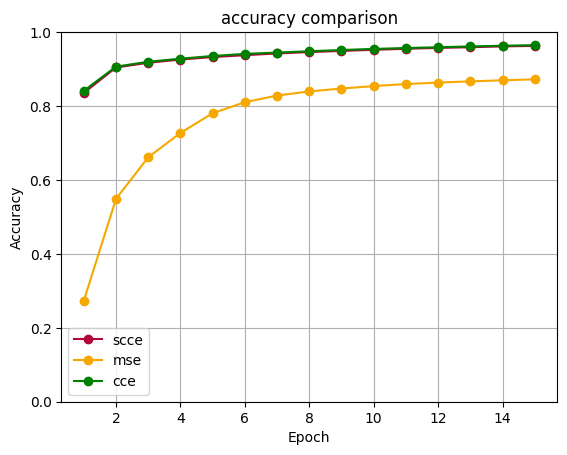

In [5]:
def plot_learning_curve(ylim=0.6):
    plt.figure()
    plt.title("accuracy comparison")
    axes = plt.gca()
    axes.set_ylim([ylim, 1])
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    train_sizes = np.arange(1, 1 + len(history[0].history['accuracy']))
    plt.ylim((0,1))
    plt.grid()
    plt.plot(
        train_sizes,
        history[0].history['accuracy'],
        'o-',
        color=(177/255, 6/255, 58/255),
        label="scce"
    )
    plt.plot(
        train_sizes,
        history[1].history['accuracy'],
        'o-',
        color=(246/255, 168/255, 0),
        label="mse")
    
    plt.plot(
        train_sizes,
        history[2].history['accuracy'],
        'o-',
        color='green',
        label="cce"
    )

    plt.legend(loc="best")
    return plt

plot_learning_curve()

- scce = Sparse Categorical Crossentropy
- cce = Categorical Crossentropy
- mse = Mean Squared Error

# Wann sollte man CategoricalCross Entropy nutzen und wann Sparse Categorical Crossentropy?

für `Categorical Cross Entropy` müssen die Labels als Array mit einer 1 am Index der zugehören Klasse vorliegen.


für `Sparse Categorical Cross Entropy` müssen die Labels mit Bezeichnung der Ausgangsklasse vorliegen.

In [6]:
_test_labels = keras.utils.to_categorical(test_labels, 10)

print('Test labels categorical:')
print(_test_labels[:2])
print('Verwendung der categorical_crossentropy gefordert')
print('\n')
print('Test labels non categorical:')
print(test_labels[:2])
print('Verwendung der sparse_categorical_crossentropy gefordert')

Test labels categorical:
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Verwendung der categorical_crossentropy gefordert


Test labels non categorical:
[7 2]
Verwendung der sparse_categorical_crossentropy gefordert


Umwandlung in Categorical Werte:

In [7]:
_test_labels = keras.utils.to_categorical(train_labels, 10)

### Quellen


1. <a href="https://towardsdatascience.com/machine-learning-for-beginners-an-introduction-to-neural-networks-d49f22d238f9">Machine Learning for Beginners an Introduction to Neural Networks</a>
2. <a href="https://learn.microsoft.com/de-de/training/modules/intro-machine-learning-keras/">Coding Beispiel eines Neuronalen Netzes von Microsoft</a>
3. <a href="https://open.hpi.de/courses/neuralnets2020/overview">Online Kurs von OpenHPI zu Neuronalen Netzen</a>
4. <a href="https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd">Learn to write LaTeX in Jupyter Notebook</a>
5. <a href="http://neuralnetworksanddeeplearning.com/">Buch: Einführung in Neuronale Netze und Deep Learning</a>
6. <a href="https://www.youtube.com/watch?v=aircAruvnKk">Video: What is a Neural Network</a>
7. <a href="https://www.youtube.com/watch?v=IHZwWFHWa-w">Video: Gradient descent, how neural networks learn</a>
8. <a href="https://www.youtube.com/watch?v=Ilg3gGewQ5U">Video: What does Backpropagation do?</a>
9. <a href="https://de.wikipedia.org/wiki/Kreuzentropie">Wikipedia: Kreuzentropie</a>
10. <a href="https://vitalflux.com/keras-categorical-cross-entropy-loss-function/#:~:text=categorical_crossentropy%3A%20Used%20as%20a%20loss%20function%20for%20multi-class,converted%20into%20categorical%20encoding%20using%20keras.utils%20to_categorical%20method.">Article: Cross Entropy Loss Function </a>
11. <a href="https://www.grund-wissen.de/informatik/latex/mathematischer-formelsatz.html#:~:text=Das%20Summenzeichen%20kann%20im%20Mathe-Modus%20mittels%20sum%20gedruckt,Syntax%20genutzt%20und%20somit%20sum_%20%7B%7D%5E%20%7B%7D%20geschrieben%3A">Artikel: Mathematischer Formelsatz LaTeX</a>
12. <a href=""></a>
13. <a href=""></a>

### Dokumentation benutzter Libraries

1. <a href="https://www.tensorflow.org/api_docs/python/tf/keras">Keras</a>
2. <a href="https://numpy.org/doc/stable/user/index.html#user">Numpy</a>
3. <a href="https://matplotlib.org/stable/api/pyplot_summary.html">Matplotlib</a>
4. <a href="https://www.tensorflow.org/api_docs/python/tf">Tensorflow</a>
5. <a href="https://scikit-learn.org/stable/">Scikit-Learn</a>

### Empfehlungen bei zusätzlichem Literatur-/Informationsbedarf

1. <a href="https://towardsdatascience.com/">Towards Data Science Blog</a>
2. <a href=""></a>
3. <a href=""></a>
4. <a href=""></a>
5. <a href=""></a>